In [1]:
import sys
import os
sys.path.append(sys.path[0] + "/..")

%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import math
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style()

In [2]:
# directory = '../experiments/data/raw/DJA-stocks'

# dja = []
# for filename in os.listdir(directory):
#     if filename.endswith(".csv"):
#         df = pd.read_csv(directory + "/" + filename)
#         df.name = filename.split('-')[1]
#         df['name'] = df.name
#         df.columns = df.columns.str.replace('\d+', '').str.replace('.', '').str.replace(' ', '')
#         dja.append(df)
        
# df_dja = pd.concat(dja, axis=0)
# df_dja.to_csv('../experiments/data/raw/DJA-2000-2020.csv')

In [3]:
# df_dja = df_dja.drop(['volume'], axis=1)
# df_dja.to_csv('../experiments/data/interim/DJA-2000-2020-clean.csv')

In [4]:
df_dja = pd.read_csv('../experiments/data/interim/DJA-2000-2020-clean.csv')
df_dja['date'] = pd.to_datetime(df_dja['date'])
df_dja.set_index('date', inplace=True)
df_dja = df_dja.drop('Unnamed: 0', axis=1)
df_dja.head()

,open,high,low,close,name
date,,,,,
2000-05-11,101.37,104.25,99.00,102.81,AAPL
2000-05-12,106.00,110.50,104.77,107.62,AAPL
2000-05-15,108.06,108.06,100.12,101.00,AAPL
2000-05-16,104.52,109.06,102.75,105.69,AAPL
2000-05-17,103.62,103.69,100.37,101.37,AAPL


In [5]:
df_dja = df_dja[(df_dja['name'] != 'V') & (df_dja['name'] != 'DOW')]

In [8]:
from hedgepy.core import build_series, build_network_time_series
from hedgepy.utils import write_series, read_series, read_data

# dja_series = build_series(df=df_dja, ticker_col_name='name', rolling_window=90, detrend=True, coalesce=True)

In [9]:
# write_series(dja_series, file_name='DJA-2000-2020-rolling-90d-dcor.json')
dja_series = read_series('DJA-2000-2020-rolling-90d-dcor.json')

In [10]:
# not sure why first df is all nans... will have to loops over dict and drop if df contains any nans
dja_series.pop(pd.Timestamp('2000-09-18 00:00:00'))

,AAPL,AXP,BA,CAT,CSCO,CVX,DIS,GS,HD,IBM,...,NKE,PFE,PG,RTX,TRV,UNH,VZ,WBA,WMT,XOM
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_dja_index = pd.read_csv('../experiments/data/raw/DJA-index/DJA-2000-2020-index.csv')
df_dja_index['Date'] = pd.to_datetime(df_dja_index['Date'])
df_dja_index.set_index('Date', inplace=True)
df_dja_index.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-05-11,10369.269531,10575.099609,10369.269531,10545.969727,10545.969727,185720000
2000-05-12,10549.059570,10673.790039,10543.919922,10609.370117,10609.370117,137770000
2000-05-15,10606.969727,10811.549805,10605.259766,10807.780273,10807.780273,155810000
2000-05-16,10816.009766,10971.240234,10816.009766,10934.570313,10934.570313,181920000
2000-05-17,10930.639648,10930.639648,10752.610352,10769.740234,10769.740234,169570000


In [12]:
from hedgepy.centrality import global_degree_centrality, global_eigencentrality

nx_ts_soft = build_network_time_series(dja_series, soft_threshold=True)

In [13]:
nx_ts_02 = build_network_time_series(dja_series, soft_threshold=False, corr_threshold=0.2)
nx_ts_03 = build_network_time_series(dja_series, soft_threshold=False, corr_threshold=0.3)
nx_ts_04 = build_network_time_series(dja_series, soft_threshold=False, corr_threshold=0.4)
nx_ts_05 = build_network_time_series(dja_series, soft_threshold=False, corr_threshold=0.5)
nx_ts_06 = build_network_time_series(dja_series, soft_threshold=False, corr_threshold=0.6)
nx_ts_07 = build_network_time_series(dja_series, soft_threshold=False, corr_threshold=0.7)
nx_ts_08 = build_network_time_series(dja_series, soft_threshold=False, corr_threshold=0.8)
nx_ts_09 = build_network_time_series(dja_series, soft_threshold=False, corr_threshold=0.9)

In [14]:
nx_ts_list = [nx_ts_02, nx_ts_03, nx_ts_04, nx_ts_05, nx_ts_06, nx_ts_07, nx_ts_08, nx_ts_09]

df_list = [global_degree_centrality(G) for G in nx_ts_list]
df_dc = pd.concat(df_list, axis=1)

In [15]:
df_ec = global_eigencentrality(nx_ts_soft)

In [16]:
col_names = [f'dcor > {i}' for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]]
df_dc.columns = col_names

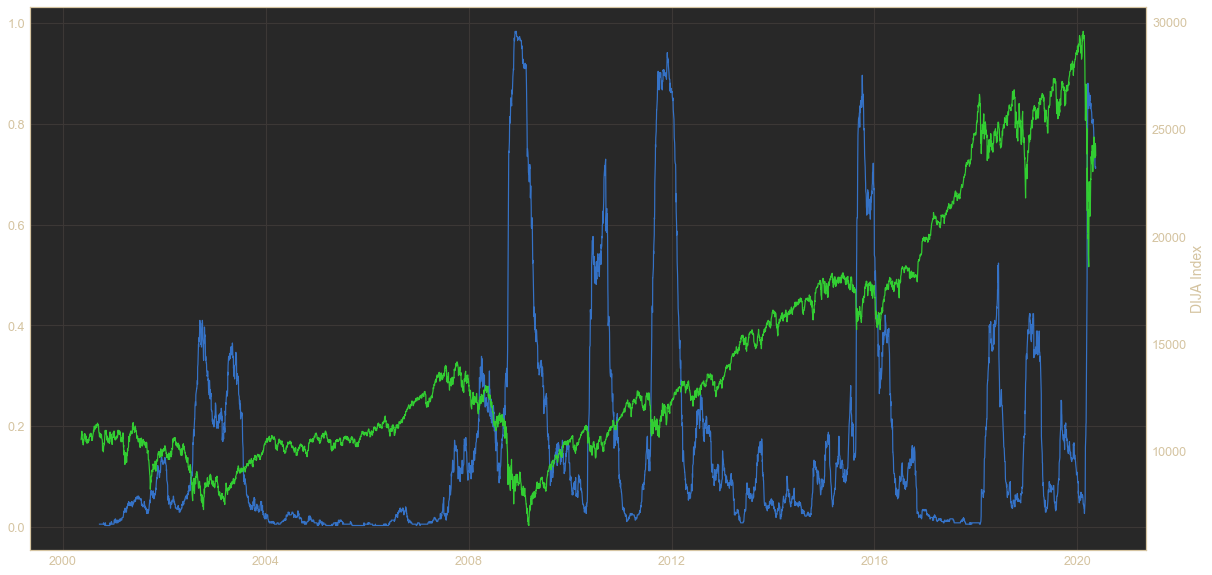

In [55]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_dc['dcor > 0.6'])
ax2 = ax.twinx()
ax2.plot(df_dja_index['Close'], color='limegreen')
ax2.set_ylabel('DIJA Index', fontsize=14)
ax2.grid(False)

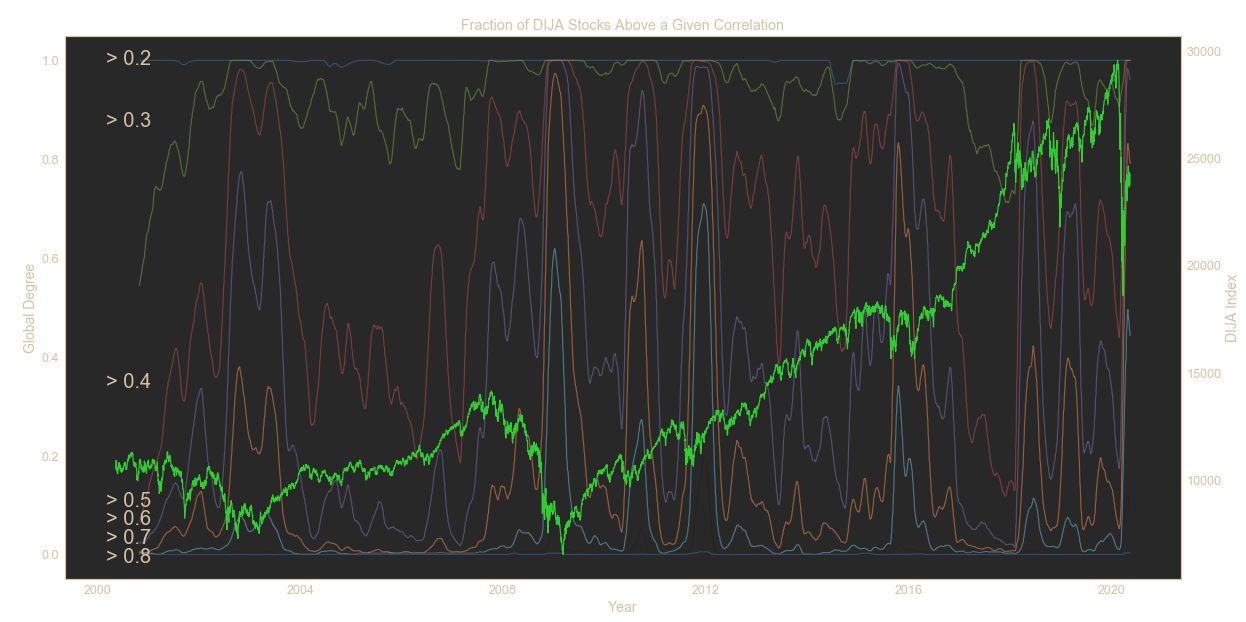

In [18]:
fig, ax = plt.subplots(figsize=(20,10))
for col in df_dc.columns:
    ax.plot(df_dc[col].rolling(30).mean(), alpha=0.5)

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Global Degree", fontsize=14)
ax.set_title('Fraction of DIJA Stocks Above a Given Correlation')
ax.grid(False)
ax.annotate('> 0.2',
            xy=(0.085, .92), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.3',
            xy=(0.085, .82), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.4',
            xy=(0.085, .40), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.5',
            xy=(0.085, .21), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.6',
            xy=(0.085, .18), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.7',
            xy=(0.085, .15), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)
ax.annotate('> 0.8',
            xy=(0.085, .12), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=20)

ax2 = ax.twinx()
ax2.plot(df_dja_index['Close'], color='limegreen')
ax2.set_ylabel('DIJA Index', fontsize=14)
ax2.grid(False)

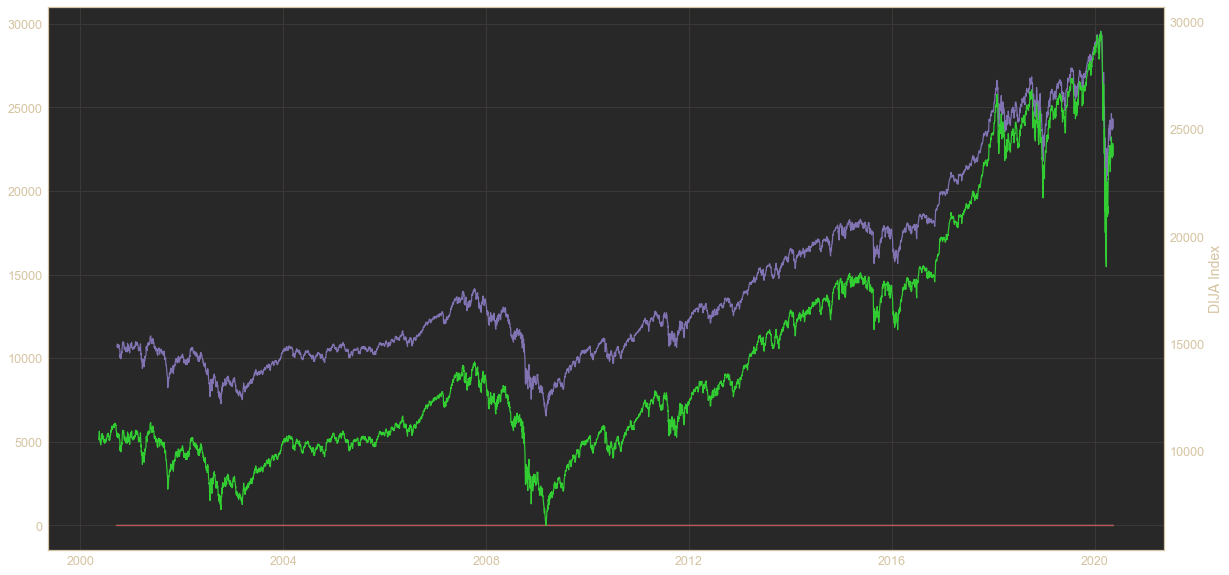

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_ec)
ax2 = ax.twinx()
ax2.plot(df_dja_index['Close'], color='limegreen')
ax2.set_ylabel('DIJA Index', fontsize=14)
ax2.grid(False)

In [20]:
df_ec['pct_change'] = df_ec[['global_eigencentrality']].pct_change()
df_ec.dropna(inplace=True)

In [22]:
def optimize_OneClassSVM(X, n):
    print('searching for optimal hyperparameters...')
    nu = np.linspace(start=1e-5, stop=1e-2, num=n)
    gamma = np.linspace(start=1e-6, stop=1e-3, num=n)
    opt_diff = 1.0
    opt_nu = None
    opt_gamma = None
    for i in range(len(nu)):
        for j in range(len(gamma)):
            classifier = OneClassSVM(kernel="rbf", nu=nu[i], gamma=gamma[j])
            classifier.fit(X)
            label = classifier.predict(X)
            p = 1 - float(sum(label == 1.0)) / len(label)
            diff = math.fabs(p - nu[i])
            if diff < opt_diff:
                opt_diff = diff
                opt_nu = nu[i]
                opt_gamma = gamma[j]
    return opt_nu, opt_gamma

In [23]:
X_train = df_ec[['pct_change']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled).dropna()

opt_nu, opt_gamma = optimize_OneClassSVM(X_train, n=20)

searching for optimal hyperparameters...


In [24]:
print(opt_nu)
print(opt_gamma)

0.007896842105263159
5.357894736842106e-05


In [82]:
model = OneClassSVM(nu=1/np.sqrt(len(df_ec)), kernel='rbf', gamma=1/len(df_ec))
model.fit(X_train)
anomalies = pd.Series(model.predict(X_train), index=df_ec.index)

In [81]:
1/np.sqrt(len(df_ec))

0.014226319992543996

In [83]:
df_ec['anomalies'] = anomalies
df_ec['DJA'] = df_dja_index['Close']

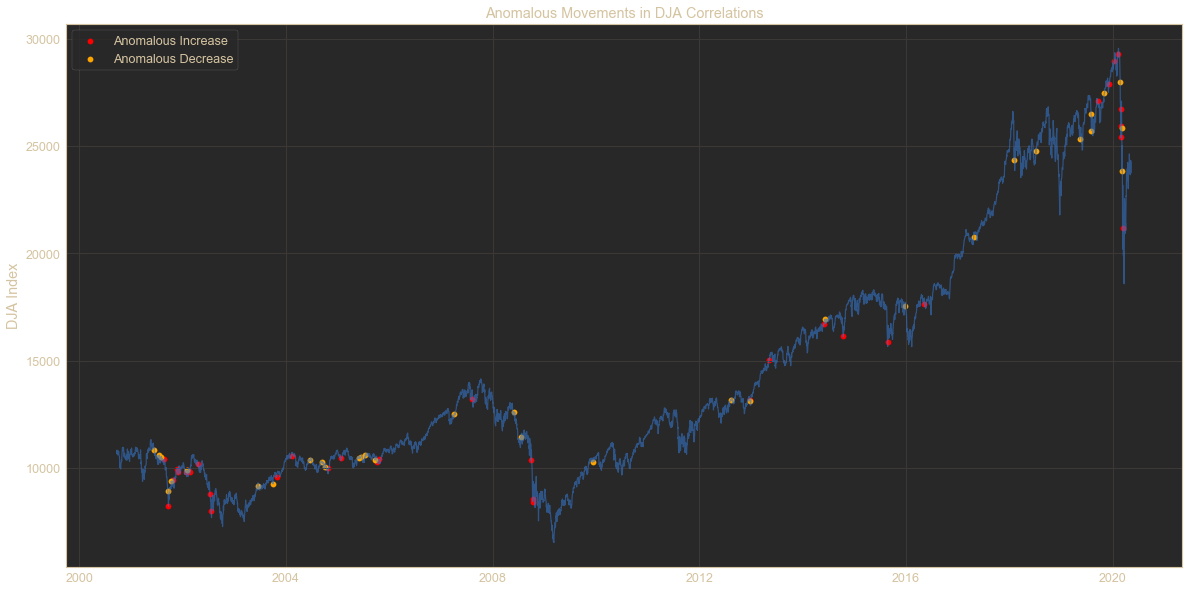

In [90]:
a = df_ec.loc[(df_ec['anomalies'] == -1)]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_ec.index, df_ec['DJA'], alpha=0.6)

b = a.loc[a['pct_change'] > 0]
c = a.loc[a['pct_change'] < 0]

bsize = np.abs([(i*10000)**1.5 for i in b['pct_change'].tolist()])
csize = np.abs([(i*10000)**1.5 for i in c['pct_change'].tolist()])
ax.scatter(df_ec['DJA'][(df_ec['anomalies']==-1) & (df_ec['pct_change'] > 0)].index, df_ec['DJA'][(df_ec['anomalies']==-1) & (df_ec['pct_change'] > 0)], label='Anomalous Increase', color='red')
ax.scatter(df_ec['DJA'][(df_ec['anomalies']==-1) & (df_ec['pct_change'] < 0)].index, df_ec['DJA'][(df_ec['anomalies']==-1) & (df_ec['pct_change'] < 0)], label='Anomalous Decrease', color='orange')

bbox_props = dict(boxstyle="round,pad=0.5", fc="gray", ec="black", lw=2, alpha=0.3)
arrow_props = dict(facecolor='black', shrink=0.05)

ax.set_title('Anomalous Movements in DJA Correlations')
ax.set_ylabel('DJA Index')
ax.legend()

plt.savefig('../experiments/resources/dja-anomalies-2000-2020')

In [86]:
a['2020']

,global_eigencentrality,pct_change,anomalies,DJA
2020-01-14,0.188049,0.000700,-1,28939.669922
2020-02-11,0.187870,0.000870,-1,29276.339844
2020-02-24,0.187807,-0.001522,-1,27960.800781
2020-02-28,0.187914,0.001688,-1,25409.359375
2020-03-02,0.188064,0.000798,-1,26703.320313
2020-03-03,0.188192,0.000677,-1,25917.410156
2020-03-06,0.188117,-0.000681,-1,25864.779297
2020-03-09,0.187937,-0.000959,-1,23851.019531
2020-03-12,0.188372,0.001374,-1,21200.619141


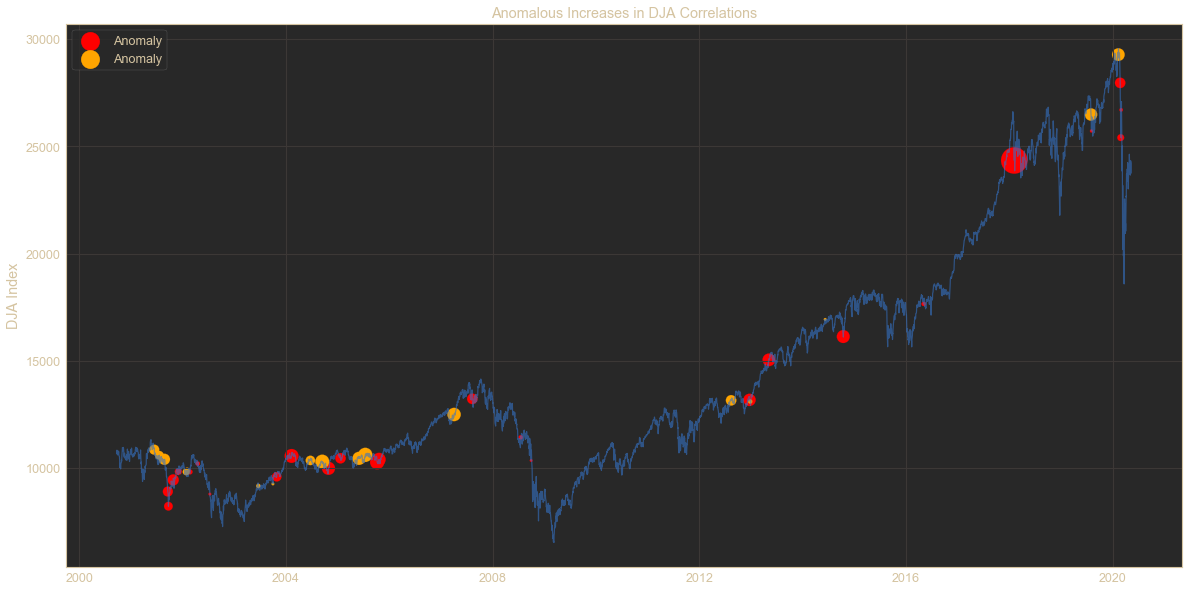

In [30]:
a = df_dc.loc[(df_dc['dcor > 0.3 anomalies'] == -1)]
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_ec.index, df_ec['DJA'], alpha=0.6)

b = a.loc[a['dcor > 0.3 pct_change'] > 0]
c = a.loc[a['dcor > 0.3 pct_change'] < 0]

bsize = np.abs([(i*1000)**1.2 for i in b['dcor > 0.3 pct_change'].tolist()])
csize = np.abs([(i*1000)**1.2 for i in c['dcor > 0.3 pct_change'].tolist()])
ax.scatter(df_dc['DJA'][(df_dc['dcor > 0.3 anomalies']==-1) & (df_dc['dcor > 0.3 pct_change'] > 0)].index, df_dc['DJA'][(df_dc['dcor > 0.3 anomalies']==-1) & (df_dc['dcor > 0.3 pct_change'] > 0)], label='Anomaly', color='red', s=bsize)
ax.scatter(df_dc['DJA'][(df_dc['dcor > 0.3 anomalies']==-1) & (df_dc['dcor > 0.3 pct_change'] < 0)].index, df_dc['DJA'][(df_dc['dcor > 0.3 anomalies']==-1) & (df_dc['dcor > 0.3 pct_change'] < 0)], label='Anomaly', color='orange', s=bsize)

ax.set_title('Anomalous Increases in DJA Correlations')
ax.set_ylabel('DJA Index')
ax.legend()